In [91]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from models import *

In [203]:
a = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/FINAL_dataset_MNIST-model_linear-epoch_30-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_64-lr_1.0.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/FINAL_dataset_MNIST-model_linear-epoch_30-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_64-lr_1.0.pt', map_location ='cpu')

In [204]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], '\n', print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1]))

b['test_acc_array'][-30:]

train loss: 0.0038673399466400346 0.0038673399466400346
test accuracy: 92.44 92.44 
 None


array([87.81, 88.04, 91.34, 90.89, 91.94, 91.93, 92.26, 92.37, 92.5 ,
       92.37, 92.45, 92.5 , 92.38, 92.46, 92.4 , 92.42, 92.41, 92.38,
       92.47, 92.42, 92.44, 92.45, 92.44, 92.44, 92.44, 92.44, 92.44,
       92.44, 92.44, 92.44])

In [205]:
# Loading the nets

net1 = VGG('VGG19')
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = VGG('VGG19')
net2.load_state_dict(b['net'], strict=False)
net2.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(1.8938)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(1.2541)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(0.8276)


torch.Size([1, 3, 32, 32])

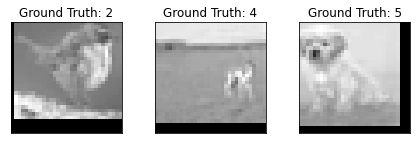

In [206]:
# loading the data

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
crop=32
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
input_dim = [1,3,32,32]
num_classes = 10

transform_train = transforms.Compose([
    transforms.RandomCrop(crop, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [207]:
Jac_1 = {}
Jac_2 = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)

In [208]:
# Jac_1[0] == Jac_2[0]

In [209]:


for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    


on the datapoint 0 we have tensor(1.0113, grad_fn=<DivBackward0>) 

on the datapoint 1 we have tensor(0.9301, grad_fn=<DivBackward0>) 

on the datapoint 2 we have tensor(1.0263, grad_fn=<DivBackward0>) 

on the datapoint 3 we have tensor(1.0088, grad_fn=<DivBackward0>) 

on the datapoint 4 we have tensor(1.0626, grad_fn=<DivBackward0>) 

on the datapoint 5 we have tensor(0.9955, grad_fn=<DivBackward0>) 

on the datapoint 6 we have tensor(1.0174, grad_fn=<DivBackward0>) 

on the datapoint 7 we have tensor(0.9911, grad_fn=<DivBackward0>) 

on the datapoint 8 we have tensor(1.0199, grad_fn=<DivBackward0>) 

on the datapoint 9 we have tensor(0.9791, grad_fn=<DivBackward0>) 

on the datapoint 10 we have tensor(0.9678, grad_fn=<DivBackward0>) 

on the datapoint 11 we have tensor(1.0417, grad_fn=<DivBackward0>) 

on the datapoint 12 we have tensor(1.0360, grad_fn=<DivBackward0>) 

on the datapoint 13 we have tensor(0.9720, grad_fn=<DivBackward0>) 

on the datapoint 14 we have tensor(1.0159, g

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.3978)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.5141)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.4365)


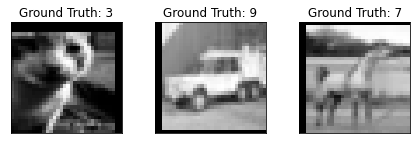

In [210]:
# loading the data - TEST


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(
    testset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()


Jac_1 = {}
Jac_2 = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)

In [211]:

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    


on the datapoint 0 we have tensor(0.9998, grad_fn=<DivBackward0>) 

on the datapoint 1 we have tensor(1.0470, grad_fn=<DivBackward0>) 

on the datapoint 2 we have tensor(1.0139, grad_fn=<DivBackward0>) 

on the datapoint 3 we have tensor(0.9752, grad_fn=<DivBackward0>) 

on the datapoint 4 we have tensor(0.9874, grad_fn=<DivBackward0>) 

on the datapoint 5 we have tensor(1.0453, grad_fn=<DivBackward0>) 

on the datapoint 6 we have tensor(1.0050, grad_fn=<DivBackward0>) 

on the datapoint 7 we have tensor(1.0088, grad_fn=<DivBackward0>) 

on the datapoint 8 we have tensor(1.0035, grad_fn=<DivBackward0>) 

on the datapoint 9 we have tensor(1.0539, grad_fn=<DivBackward0>) 

on the datapoint 10 we have tensor(0.9509, grad_fn=<DivBackward0>) 

on the datapoint 11 we have tensor(1.0489, grad_fn=<DivBackward0>) 

on the datapoint 12 we have tensor(0.9854, grad_fn=<DivBackward0>) 

on the datapoint 13 we have tensor(1.0164, grad_fn=<DivBackward0>) 

on the datapoint 14 we have tensor(0.9650, g